Q1 - What is the probability of dying from COVID infection in France in March 2023 for a 25 year old? Draw the relevant correlation projections

Load Data

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mp
import numpy as np

In [2]:
raw = pd.read_excel("owid-covid-data.xlsx")

In [3]:
raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Filter Data

In [4]:
data = pd.DataFrame(raw, columns= ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients',  'total_vaccinations', 'new_vaccinations','people_vaccinated', 'median_age','aged_65_older', 'aged_70_older','life_expectancy','population'])

In [5]:
data

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations,people_vaccinated,median_age,aged_65_older,aged_70_older,life_expectancy,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,64.83,41128772.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,64.83,41128772.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,64.83,41128772.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,64.83,41128772.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,64.83,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258973,Zimbabwe,2023-02-16,263642.0,NaN,5662.0,0.0,NaN,NaN,NaN,NaN,NaN,19.6,2.822,1.882,61.49,16320539.0
258974,Zimbabwe,2023-02-17,263642.0,NaN,5662.0,0.0,NaN,NaN,NaN,NaN,NaN,19.6,2.822,1.882,61.49,16320539.0
258975,Zimbabwe,2023-02-18,263642.0,NaN,5662.0,0.0,NaN,NaN,NaN,NaN,NaN,19.6,2.822,1.882,61.49,16320539.0
258976,Zimbabwe,2023-02-19,263642.0,NaN,5662.0,0.0,NaN,NaN,NaN,NaN,NaN,19.6,2.822,1.882,61.49,16320539.0


In [6]:
#Filter data by location
df = data[data['location'] == 'France'] 

In [7]:
#Filter data by time
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.strftime('%Y%m')

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/2197505361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/2197505361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.strftime('%Y%m')


In [8]:
df.dtypes

location                      object
date                  datetime64[ns]
total_cases                  float64
new_cases                    float64
total_deaths                 float64
new_deaths                   float64
icu_patients                 float64
hosp_patients                float64
total_vaccinations           float64
new_vaccinations             float64
people_vaccinated            float64
median_age                   float64
aged_65_older                float64
aged_70_older                float64
life_expectancy              float64
population                   float64
year_month                    object
dtype: object

In [10]:
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'icu_patients', 'hosp_patients', 'total_vaccinations',
       'new_vaccinations', 'people_vaccinated', 'median_age', 'aged_65_older',
       'aged_70_older', 'life_expectancy', 'population', 'year_month'],
      dtype='object')

In [11]:
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations,people_vaccinated,median_age,aged_65_older,aged_70_older,life_expectancy,population,year_month
80944,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.718,13.079,82.66,67813000.0,202001
80945,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.718,13.079,82.66,67813000.0,202001
80946,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.718,13.079,82.66,67813000.0,202001
80947,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.718,13.079,82.66,67813000.0,202001
80948,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,19.718,13.079,82.66,67813000.0,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82063,France,2023-02-16,39618551.0,4021.0,164753.0,27.0,745.0,13016.0,154263810.0,6625.0,54655719.0,42.0,19.718,13.079,82.66,67813000.0,202302
82064,France,2023-02-17,39622140.0,3589.0,164781.0,28.0,742.0,12995.0,154270947.0,7137.0,54656055.0,42.0,19.718,13.079,82.66,67813000.0,202302
82065,France,2023-02-18,39622140.0,0.0,164781.0,0.0,730.0,12940.0,154273183.0,2236.0,54656200.0,42.0,19.718,13.079,82.66,67813000.0,202302
82066,France,2023-02-19,39622140.0,0.0,164781.0,0.0,728.0,12940.0,154273360.0,177.0,54656220.0,42.0,19.718,13.079,82.66,67813000.0,202302


In [12]:
#filter data of February 2023
df_feb23 = df[df['year_month'] == '202302']

In [13]:
df_feb23

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations,people_vaccinated,median_age,aged_65_older,aged_70_older,life_expectancy,population,year_month
82048,France,2023-02-01,39568875.0,4506.0,164355.0,53.0,838.0,14316.0,154154745.0,10673.0,54651760.0,42.0,19.718,13.079,82.66,67813000.0,202302
82049,France,2023-02-02,39572896.0,4021.0,164407.0,52.0,819.0,14037.0,154169015.0,14270.0,54652117.0,42.0,19.718,13.079,82.66,67813000.0,202302
82050,France,2023-02-03,39576514.0,3618.0,164435.0,28.0,807.0,13921.0,154184669.0,15654.0,54652585.0,42.0,19.718,13.079,82.66,67813000.0,202302
82051,France,2023-02-04,39576514.0,0.0,164435.0,0.0,798.0,13863.0,154188872.0,4203.0,54652776.0,42.0,19.718,13.079,82.66,67813000.0,202302
82052,France,2023-02-05,39576514.0,0.0,164435.0,0.0,797.0,13863.0,154189260.0,388.0,54652797.0,42.0,19.718,13.079,82.66,67813000.0,202302
82053,France,2023-02-06,39583176.0,6662.0,164496.0,61.0,789.0,13801.0,154196274.0,7014.0,54653095.0,42.0,19.718,13.079,82.66,67813000.0,202302
82054,France,2023-02-07,39588200.0,5024.0,164538.0,42.0,780.0,13619.0,154208238.0,11964.0,54653434.0,42.0,19.718,13.079,82.66,67813000.0,202302
82055,France,2023-02-08,39592191.0,3991.0,164569.0,31.0,767.0,13577.0,154215917.0,7679.0,54653718.0,42.0,19.718,13.079,82.66,67813000.0,202302
82056,France,2023-02-09,39595844.0,3653.0,164586.0,17.0,770.0,13497.0,154225719.0,9802.0,54654052.0,42.0,19.718,13.079,82.66,67813000.0,202302
82057,France,2023-02-10,39599210.0,3366.0,164606.0,20.0,777.0,13412.0,154236432.0,10713.0,54654502.0,42.0,19.718,13.079,82.66,67813000.0,202302


In [14]:
#Sum data by year month 
df1 = df.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'icu_patients', 'hosp_patients',
       'total_vaccinations', 'new_vaccinations'].sum()

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/1691402124.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',


In [15]:
df1.head()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,new_vaccinations
year_month,,,,,,,,
202001,30.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
202002,466.0,95.0,19.0,2.0,0.0,0.0,0.0,0.0
202003,407472.0,52129.0,21323.0,3524.0,40204.0,166122.0,0.0,0.0
202004,3454189.0,140289.0,486576.0,20823.0,175719.0,880325.0,0.0,0.0
202005,5599738.0,22550.0,845555.0,4753.0,70831.0,617191.0,0.0,0.0


<Axes: xlabel='year_month'>

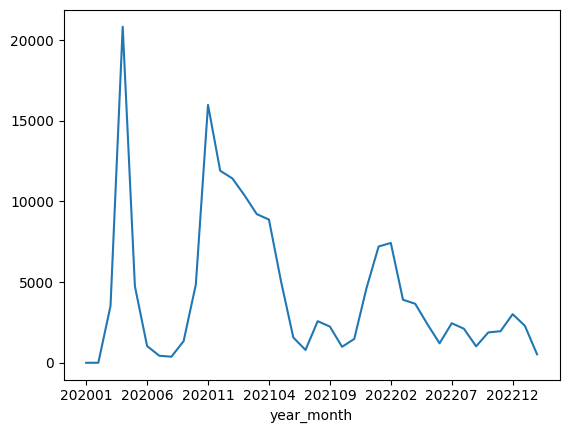

In [16]:
#Covid monthly new death trend by year and month
df1["new_deaths"].plot()

<Axes: xlabel='year_month'>

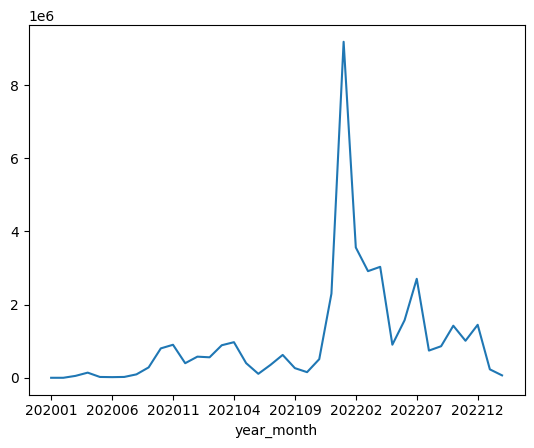

In [17]:
#Covid monthly new cases trend by year and month
df1["new_cases"].plot()

<Axes: xlabel='year_month'>

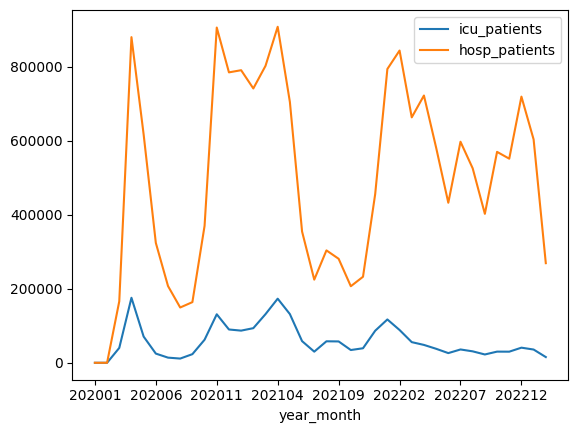

In [18]:
#Covid trend on hospitalization and icu patients by year and month
df1[["icu_patients","hosp_patients"]].plot()

<Axes: xlabel='year_month'>

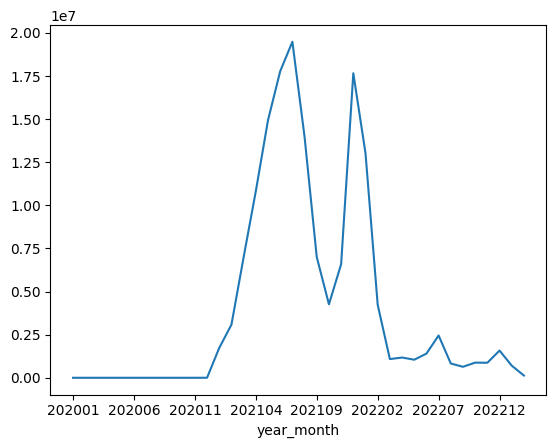

In [19]:
#Covid new vaccination trend by year and month
df1["new_vaccinations"].plot()

<Axes: xlabel='year_month'>

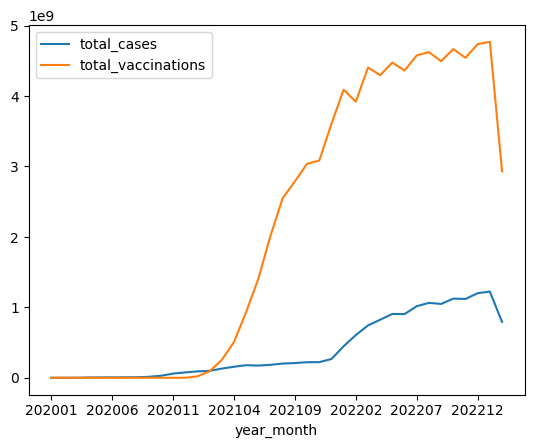

In [20]:
#Covid total cases and vaccination trend by year and month
df1[["total_cases", "total_vaccinations"]].plot()

<Axes: xlabel='year_month'>

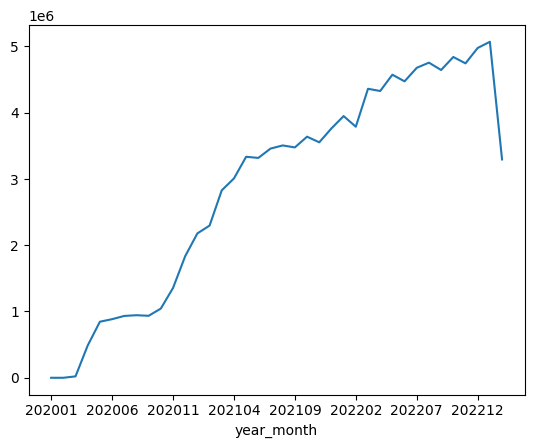

In [21]:
#Covid total death trend by year and month
df1["total_deaths"].plot()

In [22]:
df2 = pd.read_excel("vaccination by age.xlsx")

In [23]:
df3 = df2[df2['location'] == 'France'] 

In [24]:
df3['date'] = pd.to_datetime(df3['date'])
df3['year_month'] = df3['date'].dt.strftime('%Y%m') 

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/3343897629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date'])
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/3343897629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year_month'] = df3['date'].dt.strftime('%Y%m')


In [25]:
df3

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred,year_month
25839,France,2021-01-01,0-17,0.000000,0.000000,0.000000,202101
25840,France,2021-01-01,18-24,0.000000,0.000000,0.000000,202101
25841,France,2021-01-01,25-49,0.000000,0.000000,0.000000,202101
25842,France,2021-01-01,50-59,0.000000,0.000000,0.000000,202101
25843,France,2021-01-01,60-69,0.000000,0.000000,0.000000,202101
...,...,...,...,...,...,...,...
26618,France,2023-02-17,25-49,3.925694,3.709028,67.690000,202302
26619,France,2023-02-17,50-59,3.920833,91.760000,3.361806,202302
26620,France,2023-02-17,60-69,3.893056,3.808333,3.528472,202302
26621,France,2023-02-17,70-79,3.984722,93.740000,3.689583,202302


In [26]:
df3['people_vaccinated_per_hundred'] = df3['people_vaccinated_per_hundred']*100
df3['people_fully_vaccinated_per_hundred'] = df3['people_fully_vaccinated_per_hundred']*100
df3['people_with_booster_per_hundred'] = df3['people_with_booster_per_hundred']*100

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/1357431506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['people_vaccinated_per_hundred'] = df3['people_vaccinated_per_hundred']*100
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/1357431506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['people_fully_vaccinated_per_hundred'] = df3['people_fully_vaccinated_per_hundred']*100
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/1357431506.py:3: Se

In [27]:
df3

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred,year_month
25839,France,2021-01-01,0-17,0.000000,0.000000,0.000000,202101
25840,France,2021-01-01,18-24,0.000000,0.000000,0.000000,202101
25841,France,2021-01-01,25-49,0.000000,0.000000,0.000000,202101
25842,France,2021-01-01,50-59,0.000000,0.000000,0.000000,202101
25843,France,2021-01-01,60-69,0.000000,0.000000,0.000000,202101
...,...,...,...,...,...,...,...
26618,France,2023-02-17,25-49,392.569444,370.902778,6769.000000,202302
26619,France,2023-02-17,50-59,392.083333,9176.000000,336.180556,202302
26620,France,2023-02-17,60-69,389.305556,380.833333,352.847222,202302
26621,France,2023-02-17,70-79,398.472222,9374.000000,368.958333,202302


In [28]:
df5 = df3.groupby(['year_month', 'age_group'])['people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'people_with_booster_per_hundred'].sum()

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_16814/1711609930.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df3.groupby(['year_month', 'age_group'])['people_vaccinated_per_hundred',


In [29]:
df5

people_vaccinated_per_hundred  \
year_month age_group                                  
202101     0-17                            0.138889   
           18-24                           1.944444   
           25-49                          10.000000   
           50-59                          40.069444   
           60-69                          26.041667   
...                                             ...   
202302     25-49                        1177.569444   
           50-59                        1176.250000   
           60-69                        1167.777778   
           70-79                        1195.416667   
           80+                          1119.583333   

                      people_fully_vaccinated_per_hundred  \
year_month age_group                                        
202101     0-17                                  0.000000   
           18-24                                 0.000000   
           25-49                                 0.208333   
           50-59                                 1.527778   
           60-69                                 0.972222   
...                                                   ...   
202302     25-49                              1113.819444   
           50-59                             27526.000000   
           60-69                              1142.361111   
           70-79                             28122.000000   
           80+                                1088.819444   

                      people_with_booster_per_hundred  
year_month age_group                                   
202101     0-17                              0.000000  
           18-24                             0.000000  
           25-49                             0.000000  
           50-59                             0.000000  
           60-69                             0.000000  
...                                               ...  
202302     25-49                         20304.000000  
           50-59                          1005.972222  
           60-69                          1053.402778  
           70-79                          1106.805556  
           80+                           23593.000000  

[182 rows x 3 columns]